# Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [5]:
X_st = X.copy().astype(np.float64)

In [6]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
def calc_std_feat(x):
  return (x - x.mean()) / x.std()

In [7]:
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

## 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [14]:
def calc_mse(y, y_pred):
  return np.mean((y - y_pred)**2)

In [8]:
def eval_model(X, y, W_, lambda_, alpha=1e-4):  
  n = X.shape[1]
  err_old = 0
  err = 0
  iterations = 0
  while True:
    y_pred = np.dot(W_, X)
    err = calc_mse(y, y_pred)
    W_ -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sum(W_**2))
    
    if np.abs(err_old - err) < 1e-3:
        break
    err_old = err
    
  print(err)
  return W_

In [11]:
W = np.random.randn(X.shape[0])
print(W)

[ 0.45152895  0.06394657 -0.6326051   0.45503347]


In [12]:
_lambda_ = [10**x for x in range(-10, 1)]
print(_lambda_)

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]


In [16]:
result_W = list()
for i in range(len(_lambda_)):
    result_W.append(eval_model(X_st, y, W_=W.copy(), lambda_=_lambda_[i]))
result_W

42.63245629235679
42.6324600947147
42.632498118668224
42.63287839538753
42.635684969393836
42.65807045353754
42.91867029970014
49.04786946480446
286.5590617876762
1541.2311694033406
2677.2120244601465


[array([55.83264789,  4.67594725,  2.81653204,  4.15809279]),
 array([55.83264668,  4.67594674,  2.81653156,  4.15809227]),
 array([55.83263458,  4.67594169,  2.8165268 ,  4.15808713]),
 array([55.83251359,  4.67589116,  2.81647913,  4.15803568]),
 array([55.83161719,  4.67541751,  2.81597844,  4.15751416]),
 array([55.82452309,  4.67087151,  2.81082856,  4.15225745]),
 array([55.75100341,  4.62533031,  2.75957757,  4.09980567]),
 array([54.85516133,  4.17072548,  2.27336697,  3.59177353]),
 array([45.78102655,  0.86457133, -0.62531242,  0.42887999]),
 array([21.76918054, -1.1545522 , -2.03701454, -0.98732343]),
 array([ 7.96617668, -0.79322445, -1.54507657, -0.4730626 ])]

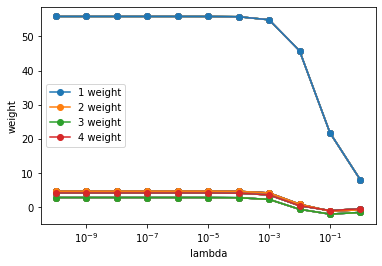

In [18]:
plt.xscale('log')
for i in range(len(_lambda_)):
    plt.plot(_lambda_, result_W, 'o-')
plt.xlabel("lambda")
plt.ylabel("weight")
plt.legend([f'{i} weight' for i in range(1, 5)])
plt.show()

## 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Совмневаюсь, но скорей всего нет, поскольку нормализация предусматривает, что после неё дипазон значений признака будет лежать между 0 и 1, при этом данные будут избавлены от выбросов и будут нормально распределёнными. Стандартизация же предусматривает центрирование данных около 0, с дисперсией 1. По смыслу это совершенно разные операции.

## 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [24]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sum(np.abs(W))) 
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [25]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [57.39421461  5.10663418  2.45907135  4.08556683] 39.981634330741784
1000 [57.39654719  5.7651832   1.85524989  4.03772303] 39.807177356149744
1500 [57.39654712  5.99017002  1.60338947  4.06768097] 39.78237999088961
2000 [57.39654705  6.07120951  1.49948638  4.09186747] 39.77852024042123
2500 [57.39654702  6.10160748  1.45689459  4.10461565] 39.77789523101215
3000 [57.39654701  6.11334122  1.43950076  4.11050505] 39.77779200885705
3500 [57.396547    6.11795782  1.43241313  4.11307023] 39.777774641523635
4000 [57.396547    6.11979656  1.42952888  4.11415421] 39.77777162084764
4500 [57.396547    6.12053453  1.42835609  4.11460473] 39.77777105812502
5000 [57.396547    6.12083211  1.42787943  4.1147902 ] 39.777770939032635


array([57.396547  ,  6.12083211,  1.42787943,  4.1147902 ])